#### ASTR 3890 - Selected Topics: Data Science for Large Astronomical Surveys (Spring 2022)
***N. Hernitschek***
___

# Homework 7
### Due: Monday, Mar 21th at 11.00am CST

The completed lecture notebook must also be submitted by 11:00am Central Time on March 21th.

---

## Problem 1

**Fitting Data with MCMC**

Start with the code snipplet below to generate data.
Then, following the approach shown in `lecture_7.ipynb`, using either `emcee` or `pymc3`, fit a straight line to the data. Create the trace plots.

- Describe/ discuss where you should cut off burn-in. 
- Compute the autocorrelation length of the chain. 
- Using `corner`, make a corner plot that has labels, shows titles, and has $68\%$ and $95\%$ quantiles and levels. 








### Solution

auto creelation length will be
[ 1.          0.01978746 -0.23734274 -0.37411368  0.1338353  -0.09091559
 -0.01015953 -0.15971141  0.08454287  0.06536097  0.26139345 -0.0015139
 -0.14789764 -0.06606035  0.02279481]


/Users/chensiyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/Users/chensiyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


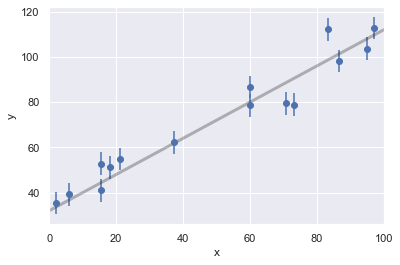

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn; seaborn.set() # for plot formatting
import scipy.optimize as op
import statsmodels.api as sm

m_true = 0.8
b_true= 32

def make_data(intercept, slope, N=15, dy=5, rseed=42):
    rand = np.random.RandomState(rseed)
    x = 100 * rand.rand(N)
    y = intercept + slope * x
    y += dy * rand.randn(N)
    return x, y, dy * np.ones_like(x)

theta_true = (37, 0.75)
x, y, dy = make_data(*theta_true)

plt.errorbar(x, y, dy, fmt='o');


x0 = np.linspace(0, 100, 500)
plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3)
plt.xlim(0, 100)
plt.xlabel("x")
plt.ylabel("y")

# Compute the autocorrelation length of the chain
auto_correlation = sm.tsa.acf(x)
print('auto creelation length will be')
print(auto_correlation)

Burn-in is intended to give the Markov Chain time to reach its equilibrium distribution. The sample size is relatively small, and they have good starting point, so there is no need to cut off burn in.

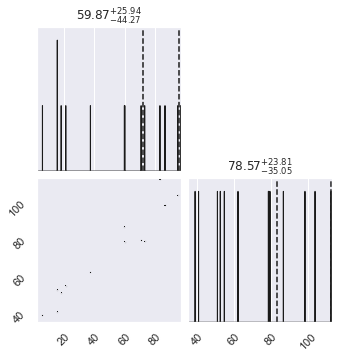

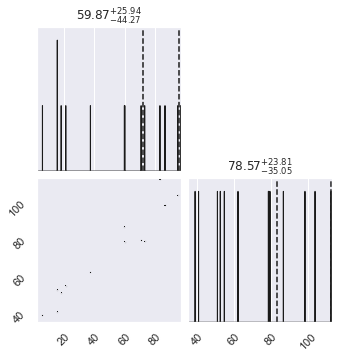

In [56]:
import corner
data = np.array((x, y))
corner.corner(data.T, 
              bins = 1000,
              show_titles = True,
              quantiles=[0.68, 0.95])